### Our project talks about:<H1><FONT COLOR=#990000>Chocolate</FONT></H1>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# ---------------------------------------------------------------------------
### הדאטה שלנו מייצגת מידע כגון: החברה והמדינה שמייצרות את השוקולד, מתי ניתן הדירוג, מקור פולי הקקאו, אחוז הקקאו, דירוג השוקולד, רכיבי השוקולד, טעמים מורגשים וכו

In [2]:
choc= 'https://raw.githubusercontent.com/SagiFarhan/DataScience---team-A/main/chocolate.csv'
choc_df= pd.read_csv(choc)
choc_df.head()

,Unnamed: 0,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,...,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
0,0,2454,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,NaN
1,1,2458,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,vegetal,savory,NaN
2,2,2454,5150,U.S.A,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,rich cocoa,fatty,bready,NaN
3,3,797,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fruity,melon,roasty,NaN
4,4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,3.50,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,vegetal,nutty,NaN,NaN


# ---------------------------------------------------------------------------

#### בחרנו לפתוח את הפרויקט שלנו עם בדיקת אחוז הקקאו בשוקולד: מהו אחוז הקקאו השכיח ביותר הקיים בשוקולד שמייצרים

C:\Users\lihi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cocoa_percent', ylabel='Density'>

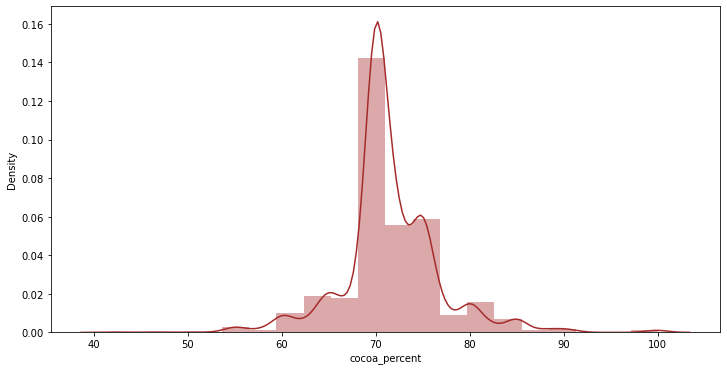

In [3]:
plt.figure(figsize=(12,6))
sns.distplot(choc_df['cocoa_percent'],bins=20,color='Brown')

לפי התרשים ניתן לראות שזה עומד על 70% קקאו

נשאלת השאלה למה דווקא 70% הוא השכיח ביותר? שאלה זו הובילה אותנו למצוא את הדבר הבא

<AxesSubplot:xlabel='cocoa_percent', ylabel='rating'>

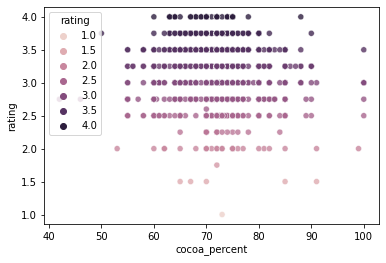

In [4]:
choc_df[['cocoa_percent', 'rating']].corr(method='spearman')
sns.scatterplot(x= "cocoa_percent", y= "rating", data= choc_df, hue= "rating", alpha= .8)

עשינו בדיקה נוספת עם אחוז הקקאו, ובחרנו לבדוק אותו אל מול הדירוג.  
ניתן לראות כי רוב הקקאו מתרכז בין ה- 60% ל- 80%. הדאטה אינה מציגה ייצור גבוה של שוקלדים עם אחוז קקאו נמוך מ- 50% או גבוה מ- 90%. ניתן להבין כי רוב החברות בוחרות לייצר שוקולדים עם 70% קקאו. 

### אז מה גורם לשוקולד להיות טעים ומועדף על פני האוכלוסייה?

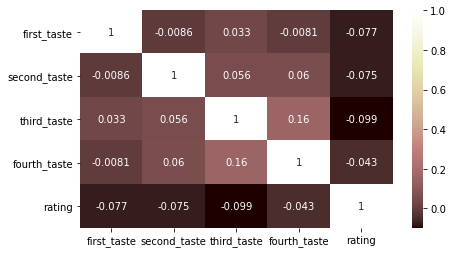

In [5]:
taste=choc_df[['first_taste','second_taste','third_taste','fourth_taste','rating']].copy()

taste['first_taste'] = taste['first_taste'].astype('category').cat.codes
taste['second_taste'] = taste['second_taste'].astype('category').cat.codes
taste['third_taste'] = taste['third_taste'].astype('category').cat.codes
taste['fourth_taste'] = taste['fourth_taste'].astype('category').cat.codes

plt.figure(figsize=(7,4)) 
sns.heatmap(taste.corr(),annot=True,cmap='pink') 
plt.show()

בדקנו האם יש קשר בין הטעמים לבין הדירוג,
וגילינו שאין קורלציה = אין קשר

### נמשיך בבדיקה מה גורם לשוקולד להיות מוצלח ובעל דירוג גבוה 

In [6]:
year=choc_df[(choc_df.loc[:,'review_date']==2019)]
companyTop=year.groupby('company')['rating'].median()
best_company=companyTop.sort_values(ascending=False)
best_company.head()

company
Dick Taylor    3.875
Mirzam         3.750
Obolo          3.750
Nikoa          3.750
Qantu          3.750
Name: rating, dtype: float64

בדקנו מהי החברה הטובה ביותר שמייצרת את השוקולד.
החלטנו להתמקד בשנה ספציפית, ובחרנו לגשת לשנת 2019 (עקב המידע הרחב בשונה לשנים האחרות)

ובשנת 2019 בדקנו את החברות אל מול הדירוג (ע"י שימוש בחציון)

היא החברה עם הדירוג הגבוה ביותר "Dick Taylor" ומצאנו שחברת

דבר זה מוביל אותנו לבדוק את הרכיבים הקיימים בשוקולד שחברה זו מייצרת, ולמצוא את התשובה שאותה אנחנו מחפשים: מה גורם לשוקולד להיות מוצלח 

In [7]:
Dick_Taylor=choc_df[(choc_df.loc[:,'review_date']==2019)&(choc_df.loc[:,'company']=='Dick Taylor')]
Dick_Taylor

,Unnamed: 0,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,...,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
649,649,2270,Dick Taylor,U.S.A,2019,Belize,"Maya Mtn, Toledo",72.0,4.00,2,...,have_not_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,creamy,sticky,dried fruit,NaN
650,650,2434,Dick Taylor,U.S.A,2019,Madagascar,"Akesson P., Sambirano",72.0,3.75,2,...,have_not_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,sticky,dried fruit,toast,cocoa



ע"פ הטבלה ניסינו להבין מה גורם לשוקולד להיות מוצלח .. האחוז קקאו 72 שזה מסתדר לנו עם המסקנה הראשונה. אין טעם ספציפי בשוקולד שמייצרים .. אולי זה משהו ברכיבים שגורם לשוקולד להיות מוצלח? נבדוק זאת ..

### איזה רכיבים גורמים לשוקולד להיות מוצלח 

In [8]:
features=['cocoa_butter_have_cocoa_butter','vanilla_have_vanila','lecithin_have_lecithin','salt_have_salt','sugar_have_sugar','sweetener_without_sugar_have_sweetener_without_sugar']
Ingredients = pd.get_dummies(choc_df[['cocoa_butter','vanilla','lecithin','salt','sugar','sweetener_without_sugar']])
Ingredients = Ingredients.drop(columns=['cocoa_butter_have_not_cocoa_butter','vanilla_have_not_vanila','lecithin_have_not_lecithin','salt_have_not_salt','sugar_have_not_sugar','sweetener_without_sugar_have_not_sweetener_without_sugar'])

In [9]:
choc = pd.concat([choc_df,Ingredients],axis=1)  # הדאטה החדשה + בינארי
choc2 = choc[['country_of_bean_origin','rating']+features]
Rating_above4 = choc2[choc2.loc[:,'rating'] >= 4.0]

In [10]:
choc = pd.concat([choc_df,Ingredients],axis=1)  # כל הדאטה - החדשה + בינארי
choc2 = choc[['country_of_bean_origin','rating']+features] # הדאטה רק עם המפעל דירוג + מרכיבים
Rating_under4 = choc2[(choc.loc[:,'rating']<4.0)]
Rating_under4 = Rating_under4.sort_values(by='rating') #  ללא דירוג 4.
Rating_under4 = Rating_under4.iloc[0:101]

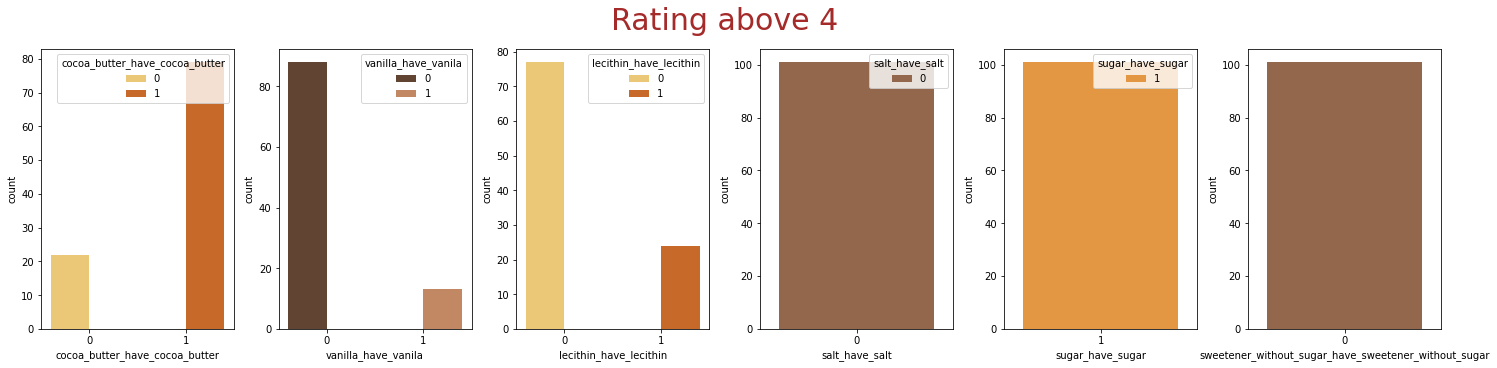

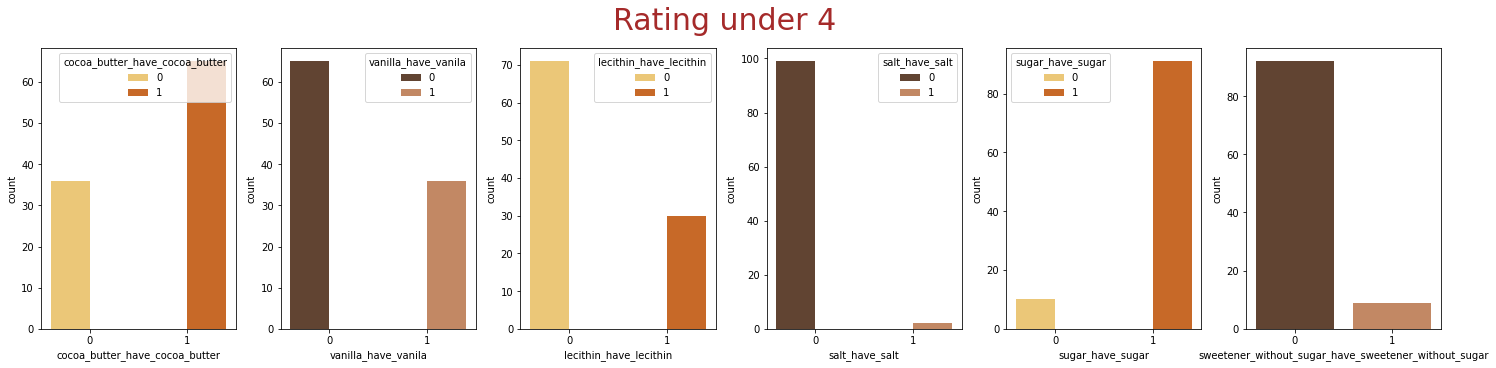

In [11]:
fig,axes = plt.subplots(figsize=(20, 5), ncols=6, sharex=False, sharey=False, constrained_layout=True)

fig.suptitle('Rating above 4' ,fontsize=30, color="Brown")
sns.countplot(ax=axes[0], x="cocoa_butter_have_cocoa_butter", data=Rating_above4, hue="cocoa_butter_have_cocoa_butter", palette="YlOrBr")
sns.countplot(ax=axes[1], x="vanilla_have_vanila", data=Rating_above4 ,hue='vanilla_have_vanila', palette="copper")
sns.countplot(ax=axes[2], x="lecithin_have_lecithin", data=Rating_above4 ,hue='lecithin_have_lecithin', palette="YlOrBr")
sns.countplot(ax=axes[3], x="salt_have_salt", data=Rating_above4,hue='salt_have_salt', palette="copper")
sns.countplot(ax=axes[4], x="sugar_have_sugar", data=Rating_above4 ,hue='sugar_have_sugar', palette="YlOrBr")
sns.countplot(ax=axes[5], x="sweetener_without_sugar_have_sweetener_without_sugar", data=Rating_above4, palette="copper")

fig,axes = plt.subplots(figsize=(20, 5), ncols=6, sharex=False, sharey=False, constrained_layout=True)

fig.suptitle('Rating under 4' ,fontsize=30, color="Brown")
sns.countplot(ax=axes[0], x="cocoa_butter_have_cocoa_butter", data=Rating_under4, hue="cocoa_butter_have_cocoa_butter" , palette="YlOrBr")
sns.countplot(ax=axes[1], x="vanilla_have_vanila", data=Rating_under4 ,hue='vanilla_have_vanila', palette="copper")
sns.countplot(ax=axes[2], x="lecithin_have_lecithin", data=Rating_under4 ,hue='lecithin_have_lecithin', palette="YlOrBr")
sns.countplot(ax=axes[3], x="salt_have_salt", data=Rating_under4 ,hue='salt_have_salt', palette="copper")
sns.countplot(ax=axes[4], x="sugar_have_sugar", data=Rating_under4,hue='sugar_have_sugar', palette="YlOrBr")
sns.countplot(ax=axes[5], x="sweetener_without_sugar_have_sweetener_without_sugar", data=Rating_under4, palette="copper")

plt.show()

* אם יש חמאת קקאו בשוקולד יש סיכוי להיכנס לדירוג 4, ואם אין אז הוא מקבל מתחת לדירוג 4 אלא אם כן יש עוד רכיבים שיכולים להעלות את הדירוג
* כמות הונילה בשוקולד משפיעה על אופן הדירוג
* כמות הלציטין בשוקולד משפיעה על אופן הדירוג
* שוקולד עם המרכיב מלח, אינו יקבל את הדירוג 4
* באופן גורף, שוקולד ללא מרכיב הסוכר, אינו מקבל את הדירוג 4

# ---------------------------------------------------------------------------

### שאלה נוספת שעלתה לנו בעיבוד הדאטה היא התייחסות לשנה בה ניתנה הביקורת אל מול הדירוג

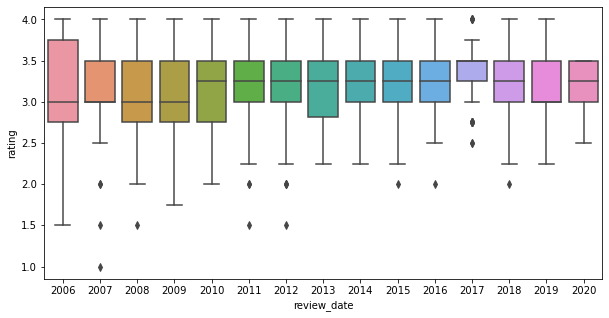

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(x='review_date', y='rating',data=choc_df)
plt.show()

ניתן לראות שהחל משנת 2010 הייתה עלייה בדירוג והטווח הצטמצם, למעט 2013 שהטווח רחב יותר וזה גרם לנו לחשוב מה גרם לזה


### נעשה בדיקה של אחוז הקקאו אל מול שנת הביקורת ונראה אם זה יענה לנו על השאלה

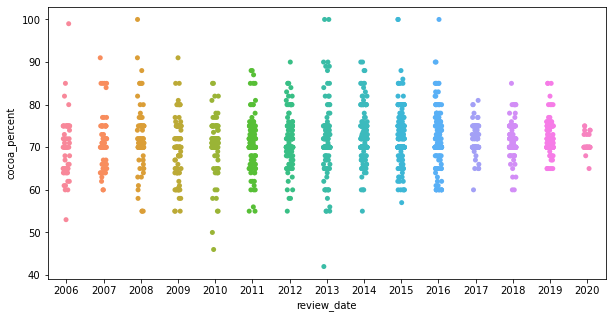

In [15]:
plt.figure(figsize=(10,5))
sns.stripplot(x="review_date", y="cocoa_percent", data=choc_df, jitter=0.09)
plt.show()

ניתן לראות שלאורך כל השנים מרבית השוקולדים מכילים 60% עד 80% קקאו, אבל עד 2010 יש פיזור רחב יותר של אחוז הקקאו

משנת 2011 עד שנת 2013 (לא כולל) הפיזור מצטמצם וניתן לראות שיש ריכוז הנע סביב ה- 70%.

בשנת 2013 הפיזור מתרחב שוב, והחל מ 2014 מצטמצם לאורך השנים.

בנוסף, תרשים זה מחזק את שאלתנו לגבי אחוז הקקאו המועדף בשוקולד, וגם פה ניתן לראות שזה נע סביב ה- 70%.

<AxesSubplot:xlabel='cocoa_percent', ylabel='rating'>

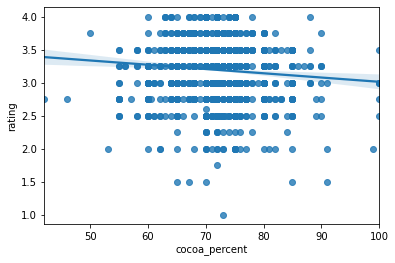

In [17]:
sns.regplot(x="cocoa_percent", y='rating',data=choc_df)

# ---------------------------------------------------------------------------

### בטח אתם שואלים מה לגבי ישראל? 
### אז החלטנו לבדוק איזה חברות יש בישראל שמייצרות את השוקולד

In [14]:
Israel_company = choc_df.loc[choc_df.company_location == 'Israel']
Israel_company

,Unnamed: 0,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,...,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
1031,1031,431,Holy Cacao,Israel,2009,Dominican republic,Hispaniola w/ nibs,75.0,3.75,2,...,have_not_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,red berry,cocoa,mild coffee,NaN
1032,1032,431,Holy Cacao,Israel,2009,Peru,San Martin,70.0,3.50,2,...,have_not_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,coffee,red berry,tart,NaN
1033,1033,431,Holy Cacao,Israel,2009,Dominican republic,Hispaniola,70.0,2.75,2,...,have_not_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,sandy,red berry,sour,NaN
1034,1034,431,Holy Cacao,Israel,2009,Ivory coast,Ivory Coast,70.0,2.50,2,...,have_not_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,dry,sour,cheesey,off
1035,1035,1466,Holy Cacao,Israel,2015,Ecuador,"Camino Verde P., Balao, Guayas",70.0,3.50,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,floral,roasty,coffee,NaN
1036,1036,1466,Holy Cacao,Israel,2015,Madagascar,Sambirano,70.0,3.50,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,rich cocoa,fatty,NaN,NaN
1037,1037,1466,Holy Cacao,Israel,2015,Trinidad,Gran Couva,70.0,3.50,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,creamy,nutty,tea,fatty
1038,1038,1466,Holy Cacao,Israel,2015,Venezuela,Mara,70.0,3.50,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,muted,fatty,nutty,NaN
1039,1039,1872,Holy Cacao,Israel,2016,Peru,Maranon,70.0,2.75,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,sour,raw,green,NaN


להפתעתנו מצאנו שקיימת רק חברה אחת בארץ שמופיעה בדאטה זו שמייצרת שוקולד. 
כמו כן, גם היא מייצרת עם 70% קקאו, ועשינו ביקור באתר שלהם ומאד התרשמנו.
וגם הם זכו ב 8 פרסי שוקולד בינלאומיים !

[by holycacao](https://www.holycacao.co.il/he/home-2/)


# ---------------------------------------------------------------------------

### ולסיום מתוק או מר לבחירתכם .. מתכון של פאדג' שוקולד קלאסי להכנה ביתית

פאדג' שוקולד קלאסי להכנה ביתית
באדיבות השף לוי ליין, שף מלון לאונרדו בוטיק ירושלים, מרשת פתאל
חומרים:
250 גרם שוקולד מריר 80% פולי קקאו
150 גרם אגוזי מלך
300 גרם חלב מרוכז
20 גרם חמאה צהובה עשירה

אופן הכנה:
1. ממיסים שוקולד למסה אחידה על אמבט מים
או במיקרוגל.
2. קוצצים את אגוזי המלך באופן גס. 
3. מוסיפים לשוקולד המומס חלב מרוכז וחמאה וטורפים במטרפה לתערובת אחידה.
4. מוסיפים לתערובת השוקולד את האגוזים הקצוצים.
5. מכניסים לתבנית מרופדת בנייר אפייה את התערובת 
ומיישרים במרית.
6. מכניסים למקרר ל־10 דקות ולאחר מכן מעבירים למקפיא לשעה עד שעה וחצי.
7. הופכים את הפאדג' הקפוא שנוצר על קרש חיתוך, ובעזרת סכין חותכים לקוביות בגודל הרצוי. 
אפשר להחליף את אגוזי המלך באגוזי לוז קלויים (בונדוק), בפיסטוקים או בבוטנים.
אפשר להוסיף טיפת ברנדי לתערובת או אפילו קורטוב מלח ים אטלנטי, לשיפור הטעמים.